# Tutorial: Logistic Regression Model on the Adult Dataset

## Step 1: Load the Adult Dataset

In [11]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset
adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame

# Display the first few rows of the dataframe
df.head()

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [20]:
# Print dataset information
print(f'Feature names: {adult.feature_names}')
print(f'Target name: {adult.target_names}')
print(f'Categories: {df['class'].unique()}')

Feature names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
Target name: ['class']
Categories: ['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']


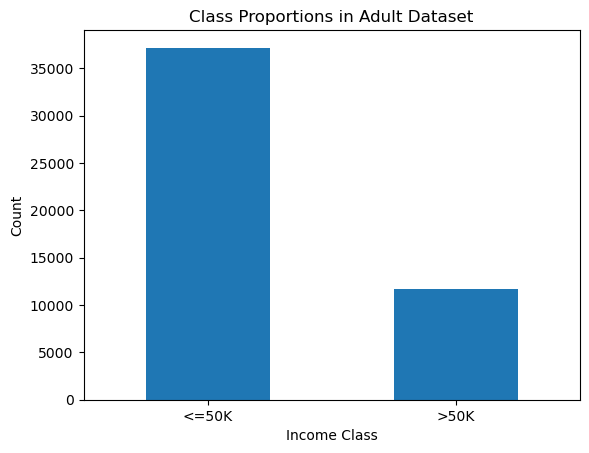

In [22]:
# Plot class proportions
import matplotlib.pyplot as plt
df['class'].value_counts().plot(kind='bar')
plt.title('Class Proportions in Adult Dataset')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  float64 
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  float64 
 3   education       48842 non-null  category
 4   education-num   48842 non-null  float64 
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  float64 
 11  capital-loss    48842 non-null  float64 
 12  hours-per-week  48842 non-null  float64 
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), float64(6)
memory usage: 2.7 MB


## Step 2: Preprocess the Dataset

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop rows with missing values

print("Initial shape of the dataset:", df.shape)
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='category').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Split features and labels
X = df_encoded.drop('class', axis=1)
y = le.fit_transform(df_encoded['class'])

# Train-val-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initial shape of the dataset: (45222, 15)
Shape after dropping missing values: (45222, 15)


## Step 3: Define Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

## Step 4: Train Model

In [8]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

## Step 4: Evaluate Model

In [ ]:
from sklearn.metrics import log_loss, accuracy_score

# Predict on test set
test_probs = logreg.predict_proba(X_test)
test_preds = logreg.predict(X_test)

# Compute validation log-loss and accuracy
test_log_loss = log_loss(y_test, test_probs)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Test Log Loss: {test_log_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Log Loss: 0.3936
Test Accuracy: 0.8172
